In [47]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

# Part I: Data preparation & analysis

In [3]:
# Load dataset

df = pd.read_csv("dataset_Seminar1.txt", delimiter=" ", header=None)
df.columns = ["STAs", "Load", "Size(x)", "Size(y)", "Area(xy)", "Contention Window", "Channel width", "Packet size", "Max RSSI", "Avg RSSI", "Min RSSI",
                "Y1 - Avg Probability of failure", "Y2 - Throughput", "Y3 - Avg Delay", "Y4 - Total airtime", "Y5 - Proportional airtime"]
df

,STAs,Load,Size(x),Size(y),Area(xy),Contention Window,Channel width,Packet size,Max RSSI,Avg RSSI,Min RSSI,Y1 - Avg Probability of failure,Y2 - Throughput,Y3 - Avg Delay,Y4 - Total airtime,Y5 - Proportional airtime
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37.0,74000000.0,38.0,21.0,798.0,15.0,80.0,10000.0,-44.634306,-63.680641,-74.131172,0.573132,1.598685e+07,1.308592e+07,1.182530,0.832656
99996,19.0,14250000.0,38.0,16.0,608.0,7.0,80.0,4000.0,-54.561591,-63.514569,-72.330456,0.560403,6.817896e+06,3.048056e+06,1.182464,0.828285
99997,40.0,30000000.0,30.0,6.0,180.0,511.0,160.0,4000.0,-42.807453,-57.221829,-68.585758,0.126492,7.255365e+06,1.215798e+07,0.904388,0.861575
99998,28.0,14000000.0,26.0,8.0,208.0,127.0,160.0,4000.0,-41.490267,-55.957674,-65.785722,0.253068,7.534308e+06,5.524271e+06,0.998722,0.894699


In [4]:
# Compute mean and standard deviation of each feature
stats = df.describe().loc[["mean", "std"]]

# Display results
stats

,STAs,Load,Size(x),Size(y),Area(xy),Contention Window,Channel width,Packet size,Max RSSI,Avg RSSI,Min RSSI,Y1 - Avg Probability of failure,Y2 - Throughput,Y3 - Avg Delay,Y4 - Total airtime,Y5 - Proportional airtime
mean,21.446170,2.140292e+07,20.562940,20.479640,421.270350,227.043920,75.106000,7997.580000,-45.911165,-57.577426,-66.467827,0.226676,9.716009e+06,4.688176e+06,0.780560,0.660724
std,11.554365,1.852042e+07,11.545206,11.540626,360.344349,323.350855,53.704279,2825.532513,5.400265,6.108548,8.057528,0.224848,4.958025e+06,7.875887e+06,0.360426,0.256756


In [5]:
# Seleccionar solo las columnas numéricas
columns_to_scale = df.select_dtypes(include=["float64", "int64"]).columns

# Aplicar centrado y normalización manualmente con stats
df_scaled = df.copy()
df_scaled[columns_to_scale] = (df[columns_to_scale] - stats.loc["mean", columns_to_scale]) / stats.loc["std", columns_to_scale]


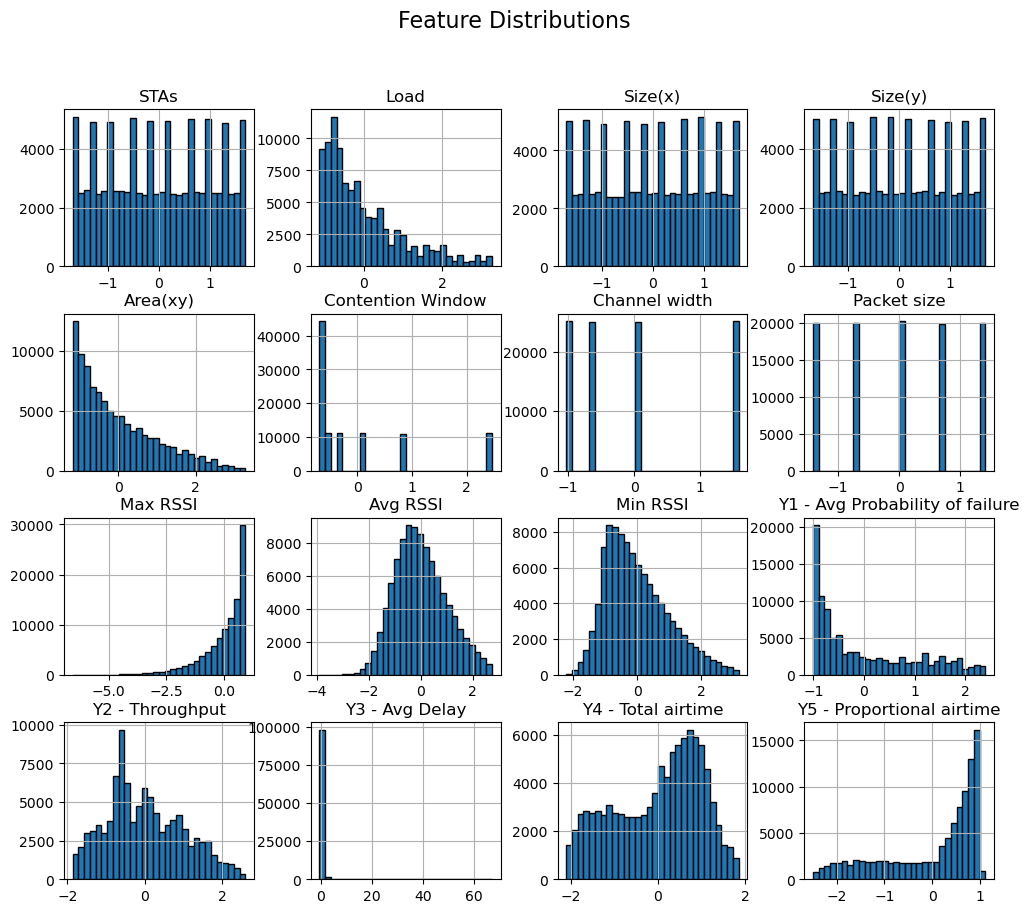

In [6]:
# View distributions

df_scaled.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

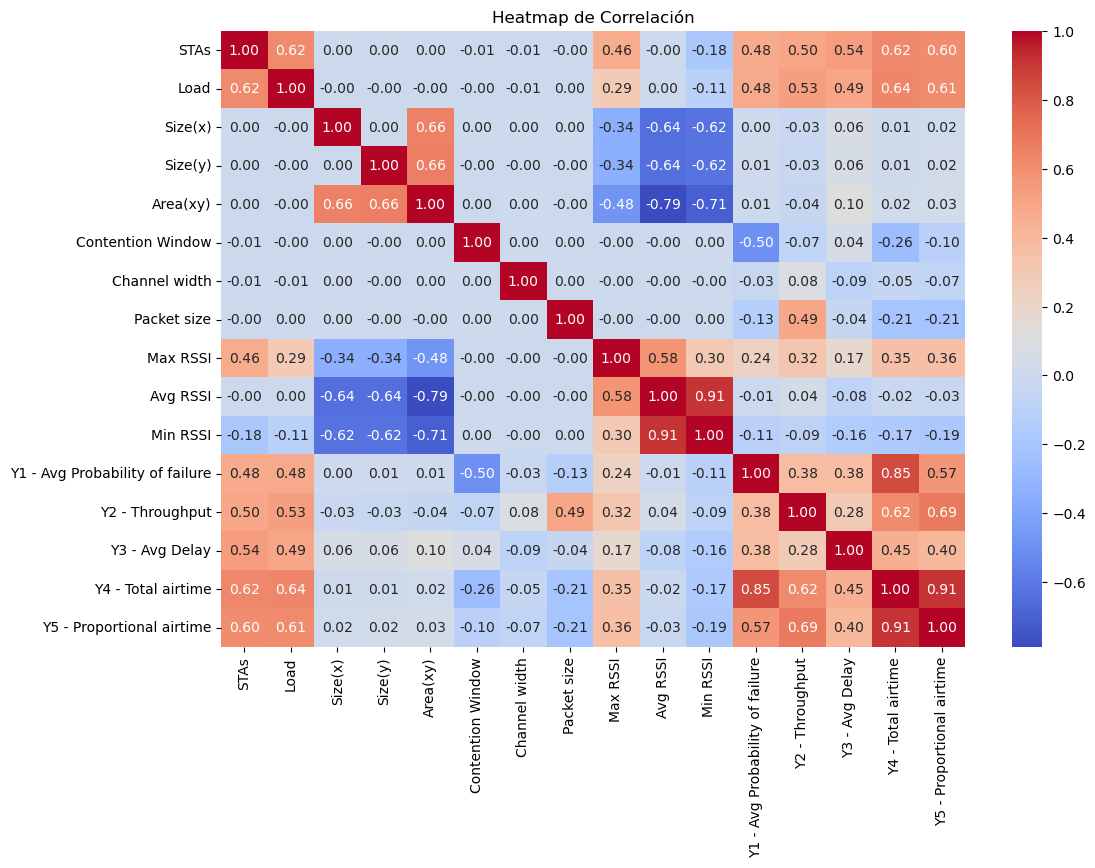

In [7]:
# Calcular la correlación entre todas las variables
correlation_matrix = df_scaled.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlación")
plt.show()

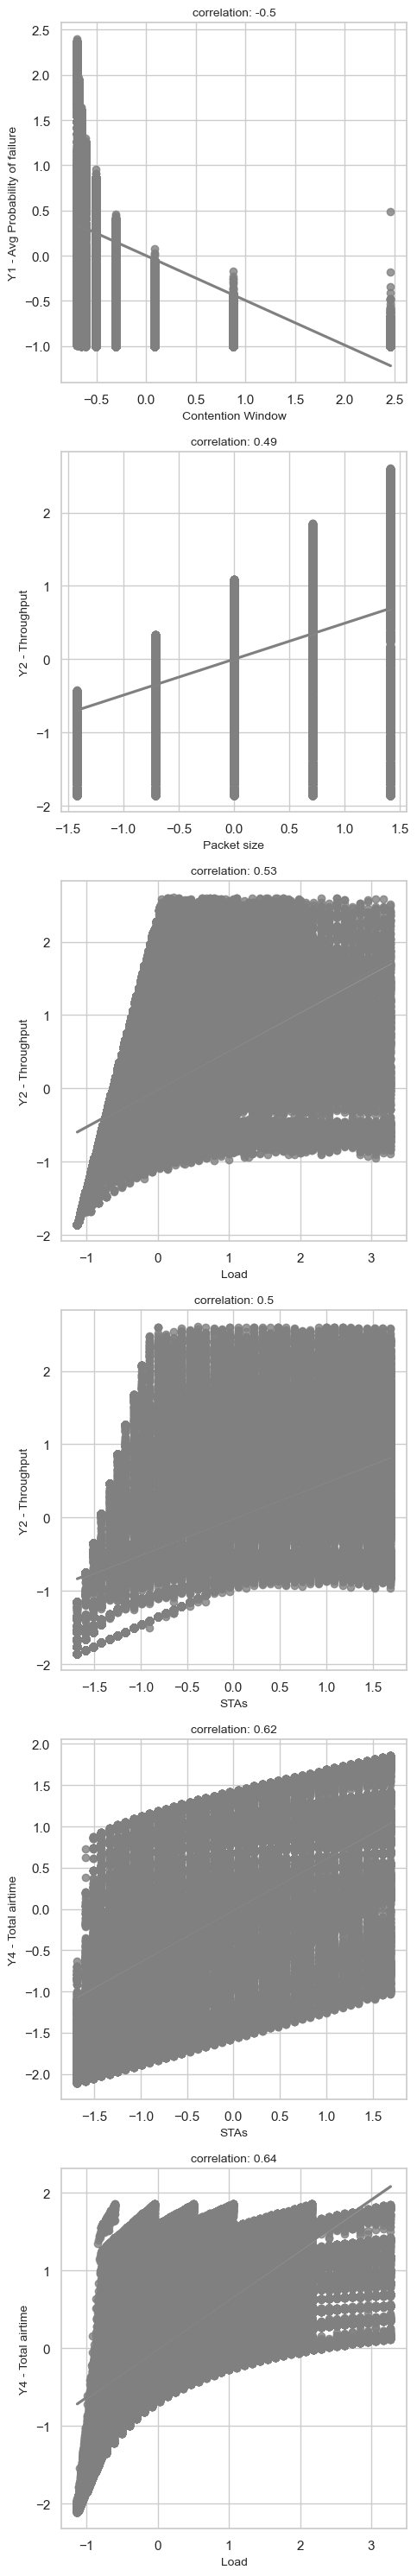

In [41]:

# Plotting the 6 most correlated features with the target variables

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)

fig.set_figheight(30)
fig.set_figwidth(5)

sns.set_theme(style="whitegrid")

# Content Window vs Y1 - Avg Probability of failure
sns.regplot(
    data=df_scaled,
    x="Contention Window",
    y="Y1 - Avg Probability of failure",
    color="grey",
    ax=ax1
)
s1, p1 = pearsonr(df_scaled["Contention Window"], df_scaled["Y1 - Avg Probability of failure"])
ax1.set_title(f"correlation: {round(s1, 2)}", fontsize=10)
ax1.set_xlabel("Contention Window", fontsize=10)
ax1.set_ylabel("Y1 - Avg Probability of failure", fontsize=10)

# Packet size vs Y2 - Throughput
sns.regplot(
    data=df_scaled,
    x="Packet size",
    y="Y2 - Throughput",
    color="grey",
    ax=ax2
)
s2, p2 = pearsonr(df_scaled["Packet size"], df_scaled["Y2 - Throughput"])
ax2.set_title(f"correlation: {round(s2, 2)}", fontsize=10)
ax2.set_xlabel("Packet size", fontsize=10)
ax2.set_ylabel("Y2 - Throughput", fontsize=10)

# Load vs Y2 - Throughput
sns.regplot(
    data=df_scaled,
    x="Load",
    y="Y2 - Throughput",
    color="grey",
    ax=ax3
)
s3, p3 = pearsonr(df_scaled["Load"], df_scaled["Y2 - Throughput"])
ax3.set_title(f"correlation: {round(s3, 2)}", fontsize=10)
ax3.set_xlabel("Load", fontsize=10)
ax3.set_ylabel("Y2 - Throughput", fontsize=10)

# STAs vs Y2 - Throughput
sns.regplot(
    data=df_scaled,
    x="STAs",
    y="Y2 - Throughput",
    color="grey",
    ax=ax4
)
s4, p4 = pearsonr(df_scaled["STAs"], df_scaled["Y2 - Throughput"])
ax4.set_title(f"correlation: {round(s4, 2)}", fontsize=10)
ax4.set_xlabel("STAs", fontsize=10)
ax4.set_ylabel("Y2 - Throughput", fontsize=10)

# STAs vs Y4 - Total Airtime
sns.regplot(
    data=df_scaled,
    x="STAs",
    y="Y4 - Total airtime",
    color="grey",
    ax=ax5
)
s5, p5 = pearsonr(df_scaled["STAs"], df_scaled["Y4 - Total airtime"])
ax5.set_title(f"correlation: {round(s5, 2)}", fontsize=10)
ax5.set_xlabel("STAs", fontsize=10)
ax5.set_ylabel("Y4 - Total airtime", fontsize=10)

# Load vs Y4 - Total Airtime
sns.regplot(
    data=df_scaled,
    x="Load",
    y="Y4 - Total airtime",
    color="grey",
    ax=ax6
)
s6, p6 = pearsonr(df_scaled["Load"], df_scaled["Y4 - Total airtime"])
ax6.set_title(f"correlation: {round(s6, 2)}", fontsize=10)
ax6.set_xlabel("Load", fontsize=10)
ax6.set_ylabel("Y4 - Total airtime", fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Split data in train & test sets

train, test = train_test_split(
    df_scaled,
    test_size= 0.2,
    random_state=42
)

test.head()

,STAs,Load,Size(x),Size(y),Area(xy),Contention Window,Channel width,Packet size,Max RSSI,Avg RSSI,Min RSSI,Y1 - Avg Probability of failure,Y2 - Throughput,Y3 - Avg Delay,Y4 - Total airtime,Y5 - Proportional airtime
75721,0.221027,-0.507706,0.557553,1.518146,1.678199,-0.655770,-1.026101,-0.706975,0.055574,-0.939341,-1.038834,1.273244,-0.190966,0.252717,0.948628,0.821158
80184,-0.644446,-0.588697,1.250481,-0.301512,0.482121,-0.309397,-1.026101,0.000856,0.905226,-0.136037,-0.582508,-0.673839,0.158126,-0.595257,0.045126,0.462358
19864,1.173048,0.734167,-0.741688,-1.081366,-0.902665,2.461586,1.580768,-1.414806,0.799012,1.189326,1.322210,-0.722388,-0.641535,0.861445,0.038251,0.449213
76699,0.307575,1.544084,-1.261384,-0.561464,-0.935967,-0.309397,-1.026101,0.000856,0.911909,1.531585,1.388560,0.038248,0.749130,0.108668,0.581433,0.955036
92991,0.740312,-0.345722,1.510329,1.084894,2.310927,2.461586,1.580768,1.416519,-1.239172,-1.266927,-1.655321,-0.870101,1.065745,-0.595257,-0.383669,-0.097268


# 2 Part II: Model implementation

In [43]:
# Regression model

def fit_regression_model(data, features, target, sample_weight=None): 
    model = LinearRegression()
    
    # extract X (features) and y (target)
    X = data[features]
    y = data[target]
    
    # fit model with or without sample weights
    if sample_weight is not None:
        model.fit(X, y, sample_weight=data[sample_weight])
    else:
        model.fit(X, y)
    
    return model

In [45]:
features = ["STAs", "Load", "Size(x)", "Size(y)", "Area(xy)", "Contention Window", "Channel width", "Packet size", "Max RSSI", "Avg RSSI", "Min RSSI"]
labels = ["Y1 - Avg Probability of failure", "Y2 - Throughput", "Y3 - Avg Delay", "Y4 - Total airtime", "Y5 - Proportional airtime"]

# Dictionary to store fitted models and their coefficients
models = {}
coefficients = {}

for label in labels:
    # Fit model
    model = fit_regression_model(train, features, target=label)
    
    # Store the model
    models[label] = model
    
    # Store the coefficients (as a dictionary mapping feature -> coefficient)
    coef_dict = dict(zip(features, model.coef_))
    coefficients[label] = coef_dict

# Print the coefficients
for label, coef_dict in coefficients.items():
    print(f"--- Coefficients for {label} ---")
    for feat, coef in coef_dict.items():
        print(f"{feat}: {coef:.4f}")
    print()

--- Coefficients for Y1 - Avg Probability of failure ---
STAs: 0.2478
Load: 0.3053
Size(x): -0.0955
Size(y): -0.0943
Area(xy): 0.0826
Contention Window: -0.4944
Channel width: -0.0259
Packet size: -0.1283
Max RSSI: 0.0374
Avg RSSI: 0.0006
Min RSSI: -0.1015

--- Coefficients for Y2 - Throughput ---
STAs: 0.1680
Load: 0.3537
Size(x): -0.3161
Size(y): -0.3182
Area(xy): 0.2465
Contention Window: -0.0697
Channel width: 0.0843
Packet size: 0.4926
Max RSSI: 0.1125
Avg RSSI: 0.0440
Min RSSI: -0.3110

--- Coefficients for Y3 - Avg Delay ---
STAs: 0.4028
Load: 0.2590
Size(x): -0.0438
Size(y): -0.0456
Area(xy): 0.1487
Contention Window: 0.0453
Channel width: -0.0892
Packet size: -0.0394
Max RSSI: -0.0563
Avg RSSI: 0.0209
Min RSSI: -0.0100

--- Coefficients for Y4 - Total airtime ---
STAs: 0.2639
Load: 0.4005
Size(x): -0.3232
Size(y): -0.3227
Area(xy): 0.2775
Contention Window: -0.2606
Channel width: -0.0405
Packet size: -0.2081
Max RSSI: 0.1145
Avg RSSI: 0.0086
Min RSSI: -0.3200

--- Coefficients

In [51]:
# Error analysis + print train and test loss

# Initialize PrettyTable
mse_table = PrettyTable()
mse_table.field_names = ["Target Variable", "Train MSE", "Test MSE"]

for label in labels:
    model = models[label]

    # Get true and predicted values for train and test sets
    y_train_true = train[label]
    y_train_pred = model.predict(train[features])

    y_test_true = test[label]
    y_test_pred = model.predict(test[features])

    # Compute MSE
    train_mse = mean_squared_error(y_train_true, y_train_pred)
    test_mse = mean_squared_error(y_test_true, y_test_pred)

    # Add to table
    mse_table.add_row([label, round(train_mse, 4), round(test_mse, 4)])

# Print table
print(mse_table)


+---------------------------------+-----------+----------+
|         Target Variable         | Train MSE | Test MSE |
+---------------------------------+-----------+----------+
| Y1 - Avg Probability of failure |   0.4542  |  0.4528  |
|         Y2 - Throughput         |   0.402   |  0.4076  |
|          Y3 - Avg Delay         |   0.6821  |  0.4931  |
|        Y4 - Total airtime       |   0.3756  |  0.3787  |
|    Y5 - Proportional airtime    |   0.4448  |  0.4501  |
+---------------------------------+-----------+----------+
